# MATH 210 Lab Quiz 2 L2B

## Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.linalg as la
%matplotlib inline

**Question 1(a)**

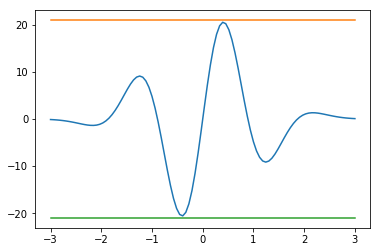

In [2]:
x = np.linspace(-3,3,100)
y = ((16*x**4 - 72*x**2 + 25)*np.sin(x) + (-32*x**3 + 56*x)*np.cos(x))*np.exp(-x**2)
plt.plot(x,y)
plt.plot([-3,3],[21,21])
plt.plot([-3,3],[-21,-21])
plt.show()

**Question 1(b)**

Note the integral was meant to be form 0 to 3 and not from -3 to 3. Note that $\sin(x) e^{-x^2}$ is an odd function and so $\int_{-3}^3 \sin(x) e^{-x^2} dx = 0$. Anyway, to compute $N$, we need:

$$
\frac{(b-a)^5 M}{180N^4} < e
$$
$$
\left( \frac{(b-a)^5 M}{180e} \right)^{1/4} < N
$$

In [3]:
def f_int(abs_tolerance):
    '''Approximate the integral of sin(x)*exp(-x^2) for -3 to 3 by the trapzezoid rule such that
    the absolute error of the approximation is less than abs_tolerance.'''
    N = int((6**5*21/180/abs_tolerance)**0.25)
    x = np.linspace(-3,3,N+1)
    y = np.sin(x)*np.exp(-x**2)
    I = spi.simps(y,x)
    return I

In [4]:
f_int(0.00000001)

5.5511151231257827e-17

**Question 2**

In [5]:
def ab_integral(a,b,u,N):
    '''Approximate the integral of 1/((x^2 + a^2)(x^2 + b^2))^{1/2} from 0 to u by
    the trapezoid rule with N subintervals.'''
    x = np.linspace(0,u,N+1)
    y = 1/np.sqrt(x**2 + a**2)/np.sqrt(x**2 + b**2)
    I = spi.trapz(y,x)
    return I

In [6]:
ab_integral(2,3,1,100)

0.15765548436349489

**Question 3**

In [7]:
def max_diff(x,y):
    '''Compute the maximum of the forward difference formulas (y[k+1] - y[k])/(x[k+1] - x[k]) for 1D arrays x and y.'''
    D = (y[1:] - y[:-1])/(x[1:] - x[:-1])
    return np.max(D)

In [8]:
X = np.linspace(0,1,50); Y = np.exp(-X)*np.sin(5*X);
max_diff(X,Y)

4.8904961398066007

**Question 4**

In [9]:
def a_solution(a,b):
    '''Compute the solution of Ax=b where A[i,j] = a[i]**j.'''
    A = np.column_stack([a**k for k in range(0,len(a))])
    if la.det(A) == 0:
        print('Matrix A is singular')
        return None
    return la.solve(A,b)

In [10]:
a = np.arange(0,1,0.2); b = np.array([2,3,-1,0,2]);
a_solution(a,b)

array([   2.        ,   51.66666667, -347.91666667,  645.83333333,
       -364.58333333])

**Question 5**

In [11]:
def eigen_X(x,y):
    mu = np.mean(x)
    nu = np.mean(y)
    xbar = x - mu
    ybar = y - nu
    X = np.column_stack([xbar,ybar])
    A = X.T @ X
    evals,evecs = la.eig(A)
    max_eig = np.max(evals.real)
    return max_eig

In [12]:
x = np.arange(0,6); y = np.arange(-3,3)
eigen_X(x,y)

35.0